# Reason (Stacking)
Data decides model, our task is to find that model with all the parameters we know. Ensemble methods have better performances in common and they also indicate they require **high computational power**. instead of coping with weak learner, we can actually combine weak learners and make a strong learner.

**Stacking (sometimes called Stacked Generalization)** is a different paradigm. The point of stacking is to explore a space of different models for the same problem. The idea is that you can attack a learning problem with **different types of models** which are capable to learn **some part of the problem**, but not the whole space of the problem.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.simplefilter("ignore")

dataset = pd.read_csv("../input/dataset.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print("Unique test counts")
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Unique test counts
[[ 1 15]
 [ 2 14]
 [ 3 16]
 [ 4 12]
 [ 5  9]
 [ 6  8]]


---

## Types of algorithms
There are various algorithms and each algorithm has it's own way of saying a relationship about a data. This is why we call an individual classification model as an **weak learner**. We can combine **same type(Homogeneous models)** of models using bagging and boosting, but stacking is kind of different it combines models of **different type(Heterogenoud models)**. This would help us to find different relationships of data.

We are here comparing different results of different models
Both **Homogeneous** and **Heterogeneous**

In [2]:
clf1 = svm.SVC(decision_function_shape='ovr')
clf1.fit(x_train, y_train)

y_pred_svm = clf1.predict(x_test)

print("Support vector classification")

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_svm)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_svm, average='weighted')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_svm, average='weighted')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_svm, average='weighted')))

confusion_1 = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix\n')
print(confusion_1)


Accuracy: 0.70

Micro Precision: 0.55
Micro Recall: 0.70
Micro F1-score: 0.60

Confusion Matrix

[[15  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 2 10  0  0  0  0]
 [ 4  4  0  0  0  1]
 [ 0  1  0  0  0  7]]


In [3]:
clf2 = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = clf2.predict(x_test)

print("Decision tree classification")

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_dt)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_dt, average='weighted')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_dt, average='weighted')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_dt, average='weighted')))

confusion_2 = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix\n')
print(confusion_2)


Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.94

Confusion Matrix

[[15  0  0  0  0  0]
 [ 0 13  0  1  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  9  0]
 [ 2  1  0  0  0  5]]


In [4]:
clf3 = GaussianNB().fit(x_train, y_train)
y_pred_gnb = clf3.predict(x_test)

print("Guassian naive bayes classification")

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_gnb)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_gnb, average='weighted')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_gnb, average='weighted')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_gnb, average='weighted')))

confusion_3 = confusion_matrix(y_test, y_pred_gnb)
print('Confusion Matrix\n')
print(confusion_3)


Accuracy: 0.84

Micro Precision: 0.86
Micro Recall: 0.84
Micro F1-score: 0.82

Confusion Matrix

[[15  0  0  0  0  0]
 [ 0  4  0  9  1  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  9  0]
 [ 0  2  0  0  0  6]]


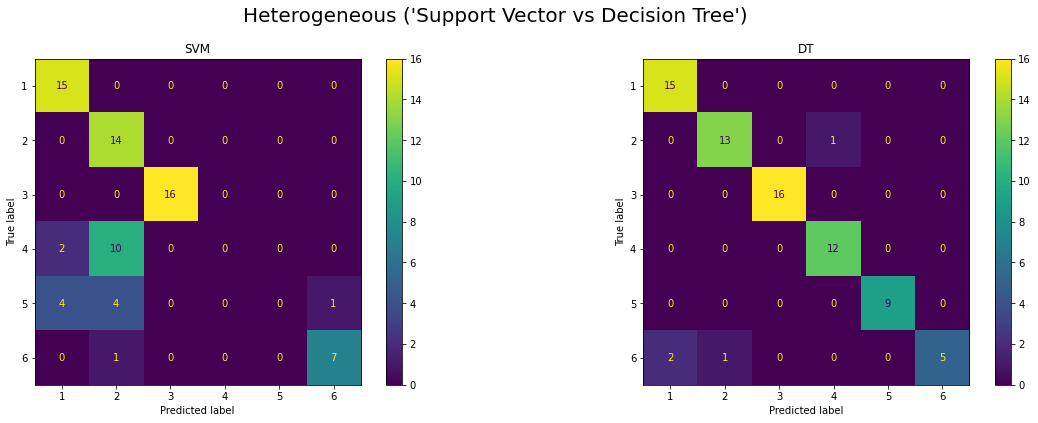

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
plot_confusion_matrix(clf1, x_test, y_test, ax=ax1)
ax1.set_title("SVM")
plot_confusion_matrix(clf2, x_test, y_test, ax=ax2)
ax2.set_title("DT")
fig.text(0.5, 1, "Heterogeneous ('Support Vector vs Decision Tree')", verticalalignment ='top', horizontalalignment ='center', fontsize = 20);

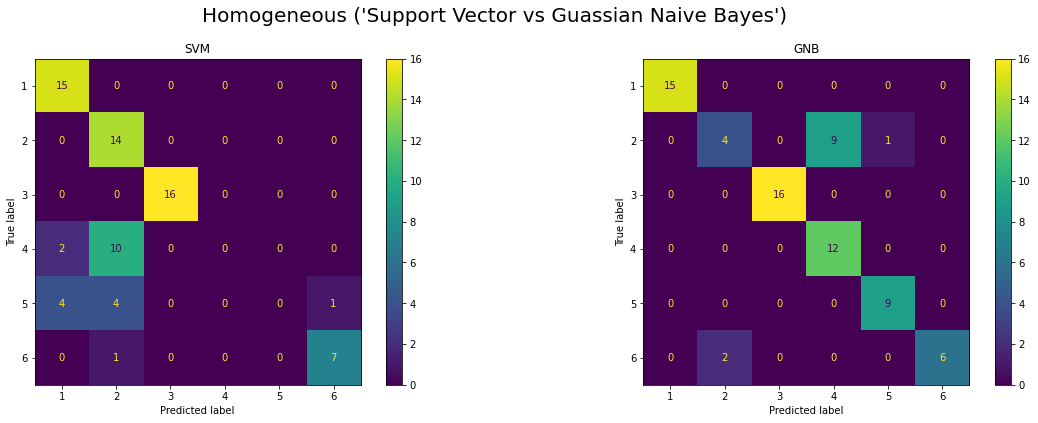

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
plot_confusion_matrix(clf1, x_test, y_test, ax=ax1)
ax1.set_title("SVM")
plot_confusion_matrix(clf3, x_test, y_test, ax=ax2)
ax2.set_title("GNB")
fig.text(0.5, 1, "Homogeneous ('Support Vector vs Guassian Naive Bayes')", verticalalignment ='top', horizontalalignment ='center', fontsize = 20);

Now we get a solid reason that saying that there are different learning for different models. Hence, we can use **stacking** to **combine models** in a particular way in which every model gives it's contribution to **predict the type of skin disease**